<a href="https://colab.research.google.com/github/uichann/My_Repository/blob/main/%EB%AA%A8%EA%B7%B8_model_1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from collections import defaultdict
import os, random

from scipy import sparse
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torch.nn.init import normal_
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

import plotnine
from plotnine import *

import seaborn as sns



In [2]:
dmg = pd.read_excel("/content/drive/MyDrive/sample_data_MORG.xlsx")

In [3]:
data = dmg[['성별','나이','키','몸무게','가슴너비','허리너비','엉덩이너비','어깨너비','BMI','가슴둘레','허리둘레','종아리최소둘레','엉덩이둘레','체지방률']].reset_index(drop = True)


In [4]:
data.columns = ['Sex','Age','Heigt','weight','Chest_wid','waist_wid','hip_wid','shoul_wid','BMI','bust','waist_cir','calf_cir','hip_cir','body_fat']

In [5]:
data['Sex'] = data['Sex'].map({'남': 1, '여': 0})

In [6]:
data.dropna(inplace=True)

In [7]:
Q1 = data[['Sex','Age','Heigt','weight','Chest_wid','waist_wid','hip_wid','shoul_wid','BMI','bust','waist_cir','calf_cir','hip_cir','body_fat']].quantile(q=0.25)
Q3 = data[['Sex','Age','Heigt','weight','Chest_wid','waist_wid','hip_wid','shoul_wid','BMI','bust','waist_cir','calf_cir','hip_cir','body_fat']].quantile(q=0.75)

In [8]:
IQR = Q3-Q1

In [9]:
#이상치 제거
IQR_df = data[(data['Sex'] <= Q3['Sex']+1.5*IQR['Sex']) & (data['Sex'] >= Q1['Sex']-1.5*IQR['Sex'])]
IQR_df = IQR_df[(IQR_df['Age'] <= Q3['Age']+1.5*IQR['Age']) & (IQR_df['Age'] >= Q1['Age']-1.5*IQR['Age'])]
IQR_df = IQR_df[(IQR_df['Heigt'] <= Q3['Heigt']+1.5*IQR['Heigt']) & (IQR_df['Heigt'] >= Q1['Heigt']-1.5*IQR['Heigt'])]
IQR_df = IQR_df[(IQR_df['weight'] <= Q3['weight']+1.5*IQR['weight']) & (IQR_df['weight'] >= Q1['weight']-1.5*IQR['weight'])]
IQR_df = IQR_df[(IQR_df['Chest_wid'] <= Q3['Chest_wid']+1.5*IQR['Chest_wid']) & (IQR_df['Chest_wid'] >= Q1['Chest_wid']-1.5*IQR['Chest_wid'])]
IQR_df = IQR_df[(IQR_df['waist_wid'] <= Q3['waist_wid']+1.5*IQR['waist_wid']) & (IQR_df['waist_wid'] >= Q1['waist_wid']-1.5*IQR['waist_wid'])]
IQR_df = IQR_df[(IQR_df['hip_wid'] <= Q3['hip_wid']+1.5*IQR['hip_wid']) & (IQR_df['hip_wid'] >= Q1['hip_wid']-1.5*IQR['hip_wid'])]
IQR_df = IQR_df[(IQR_df['shoul_wid'] <= Q3['shoul_wid']+1.5*IQR['shoul_wid']) & (IQR_df['shoul_wid'] >= Q1['shoul_wid']-1.5*IQR['shoul_wid'])]
IQR_df = IQR_df[(IQR_df['bust'] <= Q3['bust']+1.5*IQR['bust']) & (IQR_df['bust'] >= Q1['bust']-1.5*IQR['bust'])]
IQR_df = IQR_df[(IQR_df['waist_cir'] <= Q3['waist_cir']+1.5*IQR['waist_cir']) & (IQR_df['waist_cir'] >= Q1['waist_cir']-1.5*IQR['waist_cir'])]
IQR_df = IQR_df[(IQR_df['calf_cir'] <= Q3['calf_cir']+1.5*IQR['calf_cir']) & (IQR_df['calf_cir'] >= Q1['calf_cir']-1.5*IQR['calf_cir'])]
IQR_df = IQR_df[(IQR_df['hip_cir'] <= Q3['hip_cir']+1.5*IQR['hip_cir']) & (IQR_df['hip_cir'] >= Q1['hip_cir']-1.5*IQR['hip_cir'])]
IQR_df = IQR_df[(IQR_df['body_fat'] <= Q3['body_fat']+1.5*IQR['body_fat']) & (IQR_df['body_fat'] >= Q1['body_fat']-1.5*IQR['body_fat'])]

IQR_df = IQR_df[['Sex','Age','Heigt','weight','Chest_wid','waist_wid','hip_wid','shoul_wid','BMI','bust','waist_cir','calf_cir','hip_cir','body_fat']]

print('original_df :', len(data))
print('IQR_df :', len(IQR_df))

data=IQR_df

original_df : 4270
IQR_df : 4159


In [10]:
data.drop(columns=['Sex','Age','Heigt','shoul_wid'],axis=1,inplace=True)

In [11]:
data['body_fat'] = data['body_fat'].round()

In [12]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import numpy as np
import os, matplotlib
from matplotlib import pyplot as plt

### Tensorflow 2.0 ###
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras import utils

import tensorflow_addons as tfa

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import xgboost as XGB

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
x = data.drop(['body_fat'],axis=1).values
y = data['body_fat'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
logs = []
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
score = regr.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Score --> {score}")
print(f"RMSE --> {rmse}")

log = {"name": "linear_regression", "score": score, "rmse": rmse}
logs.append(log)

Score --> 0.7076015208339936
RMSE --> 3.908460427280872


In [18]:
ss= StandardScaler()
scaled_train= ss.fit_transform(X_train)
scaled_test = ss.fit_transform(X_test)
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(scaled_train,y_train)
print(knn.score(scaled_test,y_test))
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(scaled_train, y_train)
print(rf.score(scaled_test,y_test))
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(scaled_train,y_train)
print(dtc.score(scaled_test, y_test))

0.6010334166257818
0.6809535306446427
0.3278578966143717


In [ ]:
from lightgbm import LGBMRegressor
lgbmr= LGBMRegressor()
evals = [(scaled_test, y_test)]
lgbmr.fit(scaled_train, y_train)
lgbmr.score(scaled_test,y_test)
from lightgbm import LGBMRegressor
lgbmr= LGBMRegressor()
evals = [(scaled_test, y_test)]
lgbmr.fit(scaled_train, y_train,early_stopping_rounds=100, eval_metric='logloss', verbose=True, eval_set=evals)

In [ ]:
preds = lgbmr.predict(scaled_test)
preds

In [21]:
lgbmr.score(scaled_test,y_test)

0.700677444573685

avg fit time 0.14693775177001953, std :0.005504667842469344
avg score_time 0.007393503189086914, std :0.0006631234412960047
avg test_score 0.6185001335683078, std :0.12805163697979743


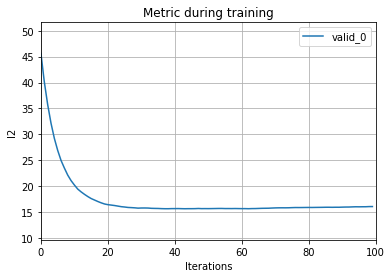

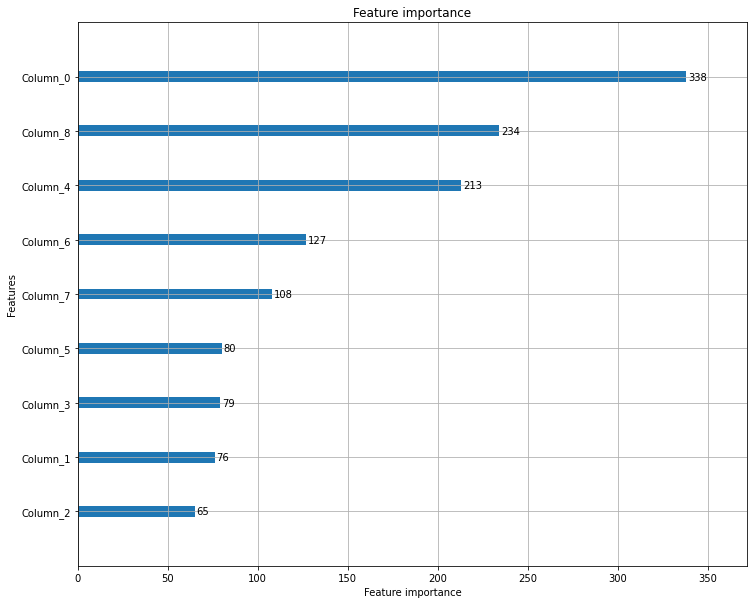

In [22]:
from sklearn.model_selection import cross_validate
cross_val = cross_validate(estimator=lgbmr,
                          X=x,y=y)

print("avg fit time {}, std :{}".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score_time {}, std :{}".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test_score {}, std :{}".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

from lightgbm import plot_importance, plot_metric, plot_tree
import graphviz
plot_metric(lgbmr);
plot_importance(lgbmr,figsize=(12,10));

In [23]:
lasso_regr = Lasso(alpha=0.5)
lasso_regr.fit(X_train, y_train)
cv_score = cross_val_score(lasso_regr, X_train, y_train, cv=10)
print(f"CV Score --> {np.mean(cv_score)}")
y_pred = lasso_regr.predict(X_test)
print(f"Score --> {lasso_regr.score(X_test, y_test)}")
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE --> {rmse}")

log = {"name": "lasso", "score": np.mean(cv_score), "rmse": rmse}
logs.append(log)

CV Score --> 0.7397834766160786
Score --> 0.6969176557820507
RMSE --> 3.979224879198296


In [24]:
ridge_regr = Ridge(alpha=0.5)
ridge_regr.fit(X_train, y_train)
cv_score = cross_val_score(ridge_regr, X_train, y_train, cv=10)
print(f"CV Score --> {np.mean(cv_score)}")
y_pred = ridge_regr.predict(X_test)
print(f"Score --> {ridge_regr.score(X_test, y_test)}")
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE --> {rmse}")

log = {"name": "ridge", "score": np.mean(cv_score), "rmse": rmse}
logs.append(log)

CV Score --> 0.7451034116448763
Score --> 0.707597556666866
RMSE --> 3.908486921498414


In [25]:
xgb_regr = XGB.XGBRegressor(learning_rate = 0.01, n_estimators=1000)
xgb_regr.fit(X_train, y_train)
cv_score = cross_val_score(xgb_regr, X_train, y_train, cv=10)
print(f"CV Score --> {np.mean(cv_score)}")
y_pred = regr.predict(X_test)
print(f"Score --> {xgb_regr.score(X_test, y_test)}")
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE --> {rmse}")

log = {"name": "XGBoost", "score": np.mean(cv_score), "rmse": rmse}
logs.append(log)

[09:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [26]:
logs

[{'name': 'linear_regression',
  'score': 0.7076015208339936,
  'rmse': 3.908460427280872},
 {'name': 'lasso', 'score': 0.7397834766160786, 'rmse': 3.979224879198296},
 {'name': 'ridge', 'score': 0.7451034116448763, 'rmse': 3.908486921498414},
 {'name': 'XGBoost', 'score': 0.7293258938438866, 'rmse': 3.908460427280872}]

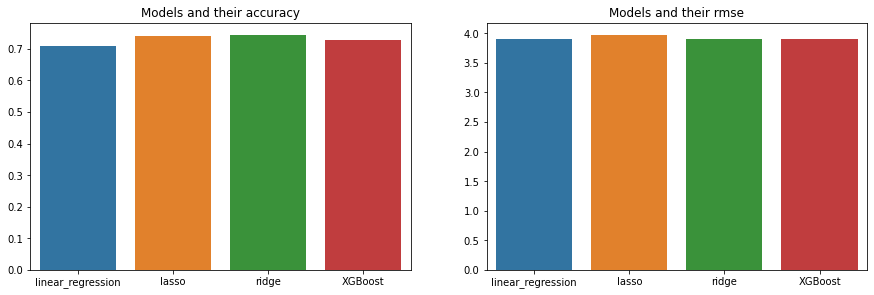

In [27]:
x = []
y = []
z = []
for log in logs:
    x.append(log['name'])
    y.append(log['score'])
    z.append(log['rmse'])
    
# sns.barplot(x,y)
# sns.barplot(x,z)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x,y)
plt.title("Models and their accuracy")

plt.subplot(2,2,2)
sns.barplot(x,z)
plt.title("Models and their rmse")

plt.show()

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [29]:
x = data.drop(['body_fat'],axis=1).values
y = data['body_fat'].values

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [31]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
x_train_scaled = scalerX.fit_transform(x_train)
x_test_scaled = scalerX.transform(x_test)

In [32]:

gbc = GradientBoostingRegressor(learning_rate=0.02,n_estimators=400,random_state=42) # 기본값: max_depth=3, learning_rate=0.1
gbc.fit(x_train, y_train)





GradientBoostingRegressor(learning_rate=0.02, n_estimators=400, random_state=42)

In [33]:
print("Model Accuracy: %.3f" % gbc.score(x_train, y_train))

Model Accuracy: 0.771


In [34]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
model2 = BaggingRegressor(base_estimator = DecisionTreeRegressor(), ## base learner, ## base learner
            n_estimators=30, ## 붓스트랩 샘플 개수 또는 base_estimator 개수
           
            random_state=0)

In [36]:
model2.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=30,
                 random_state=0)

In [37]:
predict = model2.predict(x_test)

In [38]:
print("RMSE: {}".format(sqrt(mean_squared_error(predict, y_test)))) # RMSE 결과

RMSE: 3.95636512020661


In [39]:
print(model2.score(x_train, y_train))

0.9541077610252603


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,random_state=42)
rf.fit(x_test_scaled, y_test)

RandomForestRegressor(n_estimators=200, random_state=42)

In [42]:
print(rf.score(x_test_scaled, y_test))

0.9603176705402162
